# Orientation politique des familles politiques française et principaux médias français

### Importation du csv Hills Survey 1999-2019

In [3]:
import pandas as pd

# Charger les données
df = pd.read_csv('1999-2019_CHES_dataset_means.csv')

### Garder uniquement les données sur la France des années 2002 à 2019

In [4]:
df_france = df[(df['country'] == 6) & (df['year'].between(2002, 2019))]

### Filtrer pour garder uniquement les familles politiques d'interet

In [5]:
family_mapping = {
    1: 'Radical Right',
    2: 'Conservative',
    3: 'Liberal',
    5: 'Socialist',
    6: 'Radical Left',
    7: 'Green'
}
df_france = df_france[df_france['family'].isin(family_mapping.keys())]

In [6]:
# Calcul de la moyenne du score lrgen par party_id
average_lrgen_by_id = df_france.groupby("party_id")["lrgen"].mean().reset_index()

# Récupération du premier nom de parti correspondant à chaque party_id
party_names = df_france.groupby("party_id")["party"].first().reset_index()

# Fusion des deux pour obtenir un tableau complet
average_lrgen_named = pd.merge(average_lrgen_by_id, party_names, on="party_id")

# Tri du plus à gauche au plus à droite
average_lrgen_named = average_lrgen_named.sort_values(by="lrgen")

# Affichage
print(average_lrgen_named)


    party_id     lrgen     party
15       627  1.250000        FI
0        601  1.299222       PCF
12       624  1.700000        PG
13       625  2.500000  Ensemble
3        605  2.689778     VERTS
1        602  3.270222        PS
2        603  3.793295       PRG
7        613  5.665040       UDF
9        621  6.053030        NC
10       622  6.142857       PRV
14       626  6.333333      LREM
11       623  6.600000        AC
8        615  7.070000        DL
4        609  7.440778       RPR
6        612  8.910000       MPF
16       628  9.000000       DLF
5        610  9.839051        FN


### Regrouper par famille politique et calculer la moyenne du score 'lrgen' de chaque famille

In [7]:
# Regrouper par famille politique et calculer la moyenne du score 'lrgen'
family_scores = df_france.groupby('family')['lrgen'].mean()

In [8]:
family_scores_med = df_france.groupby('family')['lrgen'].median()

### Remplacer l'indice numérique par les vrais noms de familles

In [9]:
family_scores.index = family_scores.index.map(family_mapping)

In [10]:
family_scores_med.index = family_scores_med.index.map(family_mapping)

In [11]:
family_scores_med

family
Radical Right    9.636364
Conservative     7.331111
Liberal          6.017045
Socialist        3.000000
Radical Left     1.725000
Green            2.560000
Name: lrgen, dtype: float64

In [12]:
print(family_scores_med)

family
Radical Right    9.636364
Conservative     7.331111
Liberal          6.017045
Socialist        3.000000
Radical Left     1.725000
Green            2.560000
Name: lrgen, dtype: float64


### Df en dictionnaire

In [13]:
# Transformer la Series en dictionnaire
family_scores_dict = family_scores.to_dict()

# Afficher le résultat
print(family_scores_dict)


{'Radical Right': 9.43613929748535, 'Conservative': 7.378981472651163, 'Liberal': 5.950745361328125, 'Socialist': 3.2702221851348883, 'Radical Left': 2.2599410804112754, 'Green': 2.6897777671813965}


### Renommer Socialist en Left et Conservative en Right
Pour avoir les mêmes noms de familles politiques que dans Cagé et al. (2025)

In [14]:
# Créer un nouveau dictionnaire avec les noms corrigés
family_scores_dict = {
    ('Left' if famille == 'Socialist' else
     'Right' if famille == 'Conservative' else 
     'Liberals' if famille == 'Liberal' else
     'Greens' if famille == 'Green' else 
     'Radical right' if famille == 'Radical Right' else
     'Radical left' if famille ==  'Radical Left' else
     famille): score
    for famille, score in family_scores_dict.items()
}

In [15]:
family_scores_dict

{'Radical right': 9.43613929748535,
 'Right': 7.378981472651163,
 'Liberals': 5.950745361328125,
 'Left': 3.2702221851348883,
 'Radical left': 2.2599410804112754,
 'Greens': 2.6897777671813965}

## Calculer un score par média

### Importation du csv du pourcentage d'apparition de chaque famille politique en df

In [16]:
df_media_apparition = pd.read_csv("clean_biais_medias.csv")

In [17]:
df_media_apparition.set_index('Media', inplace=True)

### Supprimer la colonne "Other"

In [18]:
df_media_apparition = df_media_apparition.drop(columns=["Other"])

In [19]:
df_media_apparition

,Radical left,Greens,Left,Liberals,Right,Radical right
Media,,,,,,
Radio Classique,"5,535714286","5,357142857","25,17857143","12,67857143","40,71428571","7,5"
BFM Radio,"5,535714286","5,178571429","25,53571429","11,07142857","41,42857143","5,714285714"
TF1,"9,107142857",5,25,"10,89285714","38,75","7,678571429"
TMC,5,"6,25","28,03571429","9,6875","39,59821429","5,357142857"
LCI,"8,571428571","4,821428571","27,32142857","13,57142857","34,64285714","8,035714286"
CNews/I-Télé,"8,75","6,607142857","25,89285714","12,14285714","35,53571429","8,392857143"
M6,"9,107142857","7,5","27,32142857","8,571428571","36,60714286","6,964285714"
BFM TV,"9,821428571","6,785714286","28,57142857","9,821428571","33,92857143","8,75"
RMC,"7,321428571","8,392857143","29,6875","11,20535714","33,92857143","5,714285714"


In [20]:
# Remplacer les virgules par des points puis convertir en float
df_media_apparition = df_media_apparition.replace(',', '.', regex=True).astype(float)

In [21]:
df_media_apparition

,Radical left,Greens,Left,Liberals,Right,Radical right
Media,,,,,,
Radio Classique,5.535714,5.357143,25.178571,12.678571,40.714286,7.500000
BFM Radio,5.535714,5.178571,25.535714,11.071429,41.428571,5.714286
TF1,9.107143,5.000000,25.000000,10.892857,38.750000,7.678571
TMC,5.000000,6.250000,28.035714,9.687500,39.598214,5.357143
LCI,8.571429,4.821429,27.321429,13.571429,34.642857,8.035714
CNews/I-Télé,8.750000,6.607143,25.892857,12.142857,35.535714,8.392857
M6,9.107143,7.500000,27.321429,8.571429,36.607143,6.964286
BFM TV,9.821429,6.785714,28.571429,9.821429,33.928571,8.750000
RMC,7.321429,8.392857,29.687500,11.205357,33.928571,5.714286


### Normaliser pour que le total fasse 100 (car on a supprimé la colonne "Other")

In [22]:
df_media_apparition = df_media_apparition.div(df_media_apparition.sum(axis=1), axis=0) * 100

In [23]:
df_media_apparition

,Radical left,Greens,Left,Liberals,Right,Radical right
Media,,,,,,
Radio Classique,5.709024,5.524862,25.966851,13.075506,41.988950,7.734807
BFM Radio,5.860113,5.482042,27.032136,11.720227,43.856333,6.049149
TF1,9.444444,5.185185,25.925926,11.296296,40.185185,7.962963
TMC,5.323194,6.653992,29.847909,10.313688,42.157795,5.703422
LCI,8.839779,4.972376,28.176796,13.996317,35.727440,8.287293
CNews/I-Télé,8.990826,6.788991,26.605505,12.477064,36.513761,8.623853
M6,9.479554,7.806691,28.438662,8.921933,38.104089,7.249071
BFM TV,10.054845,6.946984,29.250457,10.054845,34.734918,8.957952
RMC,7.606679,8.719852,30.844156,11.641929,35.250464,5.936920


In [24]:
# Copie du DataFrame
df_media_score = df_media_apparition.copy()

In [25]:
df_media_score

,Radical left,Greens,Left,Liberals,Right,Radical right
Media,,,,,,
Radio Classique,5.709024,5.524862,25.966851,13.075506,41.988950,7.734807
BFM Radio,5.860113,5.482042,27.032136,11.720227,43.856333,6.049149
TF1,9.444444,5.185185,25.925926,11.296296,40.185185,7.962963
TMC,5.323194,6.653992,29.847909,10.313688,42.157795,5.703422
LCI,8.839779,4.972376,28.176796,13.996317,35.727440,8.287293
CNews/I-Télé,8.990826,6.788991,26.605505,12.477064,36.513761,8.623853
M6,9.479554,7.806691,28.438662,8.921933,38.104089,7.249071
BFM TV,10.054845,6.946984,29.250457,10.054845,34.734918,8.957952
RMC,7.606679,8.719852,30.844156,11.641929,35.250464,5.936920


In [26]:
for colonne in df_media_score.columns:
    df_media_score[colonne] = df_media_score[colonne]*family_scores_dict[colonne]

In [27]:
score_of_each_media = df_media_score.sum(axis=1)/100

In [28]:
score_of_each_media

Media
Radio Classique    5.733115
BFM Radio          5.668298
TF1                5.589612
TMC                5.538112
LCI                5.506170
CNews/I-Télé       5.506436
M6                 5.380870
BFM TV             5.377353
RMC                5.269246
LCP/PubSen         5.235079
France 3           5.275343
Europe 1           5.220493
RTL                5.220000
France 2           5.248545
C8/D8              5.184051
France Info        5.226295
France Culture     5.076874
France 5           5.087574
Canal+             5.127651
France Inter       5.037918
France 4           4.907228
ARTE               4.809407
dtype: float64

### rajouter un nom à la colonne des scores

In [29]:
score_of_each_media = score_of_each_media.reset_index()
score_of_each_media.columns = ["Media", "Score"]

In [30]:
score_of_each_media

,Media,Score
0,Radio Classique,5.733115
1,BFM Radio,5.668298
2,TF1,5.589612
3,TMC,5.538112
4,LCI,5.506170
5,CNews/I-Télé,5.506436
6,M6,5.380870
7,BFM TV,5.377353
8,RMC,5.269246
9,LCP/PubSen,5.235079


In [31]:
# Tri des médias par score (du plus à gauche au plus à droite)
score_of_each_media = score_of_each_media.sort_values(by="Score", ascending=True)

In [32]:
score_of_each_media

,Media,Score
21,ARTE,4.809407
20,France 4,4.907228
19,France Inter,5.037918
16,France Culture,5.076874
17,France 5,5.087574
18,Canal+,5.127651
14,C8/D8,5.184051
12,RTL,5.220000
11,Europe 1,5.220493
15,France Info,5.226295


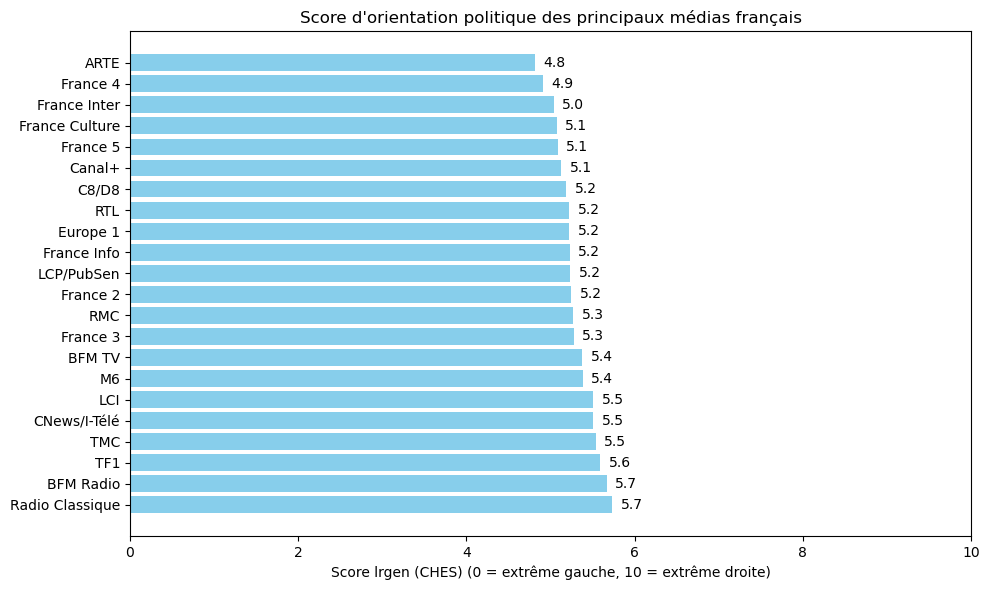

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Création du graphique
plt.figure(figsize=(10, 6))
bars = plt.barh(score_of_each_media["Media"], score_of_each_media["Score"], color='skyblue')
plt.xlabel("Score lrgen (CHES) (0 = extrême gauche, 10 = extrême droite)")
plt.title("Score d'orientation politique des principaux médias français")
plt.xlim(0, 10)

# Ajouter les scores sur les barres
for bar in bars:
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.1f}', va='center')

plt.gca().invert_yaxis()  # Pour que le média le plus à gauche soit en haut
plt.tight_layout()
plt.show()

In [34]:
df_media_score

,Radical left,Greens,Left,Liberals,Right,Radical right
Media,,,,,,
Radio Classique,12.902058,14.860651,84.917372,77.809009,309.835686,72.986713
BFM Radio,13.243511,14.745474,88.401091,69.744086,323.615066,57.080616
TF1,21.343888,13.946996,84.783538,67.221383,296.525737,75.139628
TMC,12.030105,17.897761,97.609293,61.374132,311.081586,53.818285
LCI,19.977380,13.374586,92.144382,83.288517,263.632119,78.200049
CNews/I-Télé,20.318736,18.260877,87.005911,74.247832,269.434369,81.375880
M6,21.423233,20.998265,93.000742,53.092152,281.169368,68.403240
BFM TV,22.723356,18.685842,95.655494,59.833820,256.308314,84.528487
RMC,17.190646,23.454463,100.867243,69.278158,260.112519,56.021606


## Normaliser pour que le score soit étalé (linéaire et asymétriquement)

In [35]:
# Etape 1 : Définir les bornes du score média
score_min_media = score_of_each_media["Score"].min()
score_max_media = score_of_each_media["Score"].max()


In [36]:
print(score_min_media)

4.809406649681131


In [37]:
print(score_max_media)

5.733114882992214


In [38]:
# Étape 2 : Fixer le score maximal observé parmi les partis politiques
score_max_parti = 9.839051  # Rassemblement National dans CHES

# Étape 3 : Calculer la marge d'ajustement
delta = score_max_parti - score_max_media

# Étape 4 : Calculer les bornes élargies
borne_inferieure = score_min_media - delta
borne_superieure = score_max_media + delta

# Étape 5 : Appliquer la normalisation linéaire asymétrique
def normaliser(score):
    return ((score - score_min_media) / (score_max_media - score_min_media)) * (borne_superieure - borne_inferieure) + borne_inferieure

# Étape 6 : Créer la colonne des scores normalisés
score_of_each_media["Score_normalise"] = score_of_each_media["Score"].apply(normaliser)

In [39]:
score_of_each_media

,Media,Score,Score_normalise
21,ARTE,4.809407,0.703471
20,France 4,4.907228,1.670936
19,France Inter,5.037918,2.963476
16,France Culture,5.076874,3.348752
17,France 5,5.087574,3.454574
18,Canal+,5.127651,3.850945
14,C8/D8,5.184051,4.408749
12,RTL,5.220000,4.764282
11,Europe 1,5.220493,4.769158
15,France Info,5.226295,4.826545


In [40]:
score_of_each_media.to_csv("score_media.csv")

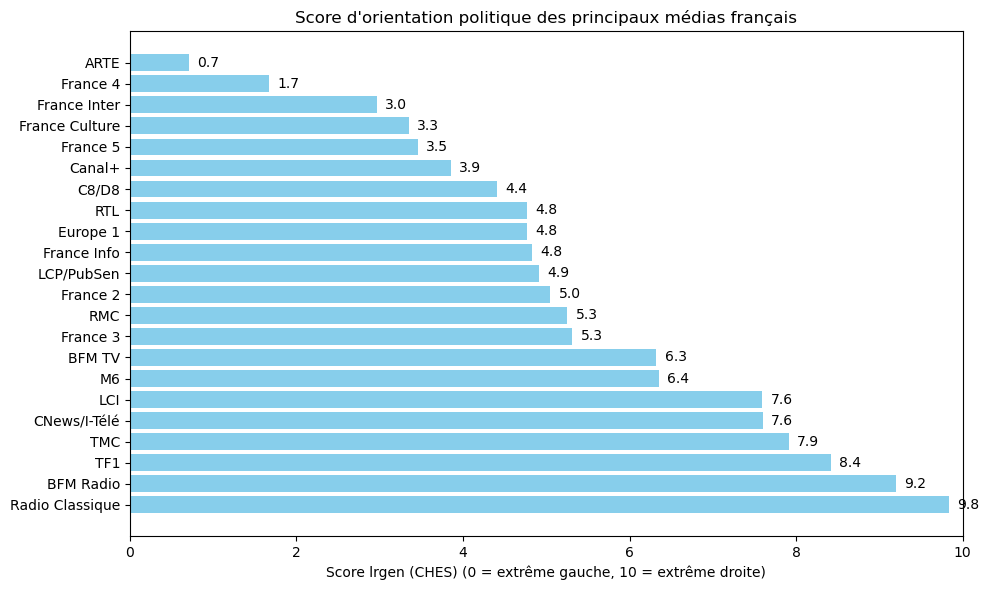

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Création du graphique
plt.figure(figsize=(10, 6))
bars = plt.barh(score_of_each_media["Media"], score_of_each_media["Score_normalise"], color='skyblue')
plt.xlabel("Score lrgen (CHES) (0 = extrême gauche, 10 = extrême droite)")
plt.title("Score d'orientation politique des principaux médias français")
plt.xlim(0, 10)

# Ajouter les scores sur les barres
for bar in bars:
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.1f}', va='center')

plt.gca().invert_yaxis()  # Pour que le média le plus à gauche soit en haut
plt.tight_layout()
plt.show()